In [1]:
import pandas as pd
df = pd.read_csv('retail_data.csv')

In [2]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [3]:
df.shape

(302010, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
df.duplicated().sum()

4

In [6]:
df = df.drop_duplicates()

print("After removing exact duplicates:", df.shape)


After removing exact duplicates: (302006, 30)


In [15]:
df = df.drop('Transaction_ID',axis=1)

In [16]:
df.columns

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount',
       'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'Ratings', 'products'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302006 entries, 0 to 302009
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       301698 non-null  float64
 1   Name              301624 non-null  object 
 2   Email             301659 non-null  object 
 3   Phone             301644 non-null  float64
 4   Address           301691 non-null  object 
 5   City              301758 non-null  object 
 6   State             301725 non-null  object 
 7   Zipcode           301666 non-null  float64
 8   Country           301735 non-null  object 
 9   Age               301833 non-null  float64
 10  Gender            301689 non-null  object 
 11  Income            301716 non-null  object 
 12  Customer_Segment  301791 non-null  object 
 13  Date              301647 non-null  object 
 14  Year              301656 non-null  float64
 15  Month             301733 non-null  object 
 16  Time              301656 

In [18]:
# Null summary for all columns
null_all = df.isnull().sum().sort_values(ascending=False)
null_all_pct = (null_all / len(df) * 100).round(4)

null_df_all = pd.concat([null_all, null_all_pct], axis=1)
null_df_all.columns = ['null_count', 'null_pct']

print("Null summary for all columns:")
print(null_df_all)


Null summary for all columns:
                  null_count  null_pct
Name                     382    0.1265
Phone                    362    0.1199
Total_Purchases          361    0.1195
Date                     359    0.1189
Amount                   356    0.1179
Year                     350    0.1159
Total_Amount             350    0.1159
Time                     350    0.1159
Email                    347    0.1149
Zipcode                  340    0.1126
Shipping_Method          337    0.1116
Gender                   317    0.1050
Address                  315    0.1043
Customer_ID              308    0.1020
Payment_Method           297    0.0983
Income                   290    0.0960
Product_Category         283    0.0937
State                    281    0.0930
Product_Brand            281    0.0930
Month                    273    0.0904
Country                  271    0.0897
City                     248    0.0821
Order_Status             235    0.0778
Customer_Segment         215    0.

In [61]:
df_clean = df.dropna().copy()

In [62]:
df_clean.shape

(294230, 29)

In [63]:

df_clean.isnull().sum().sum()

0

In [64]:
df_clean['Customer_ID'] = df_clean['Customer_ID'].astype('Int64')
print(df_clean['Customer_ID'].dtype)

Int64


In [65]:
print(df_clean['Date'].head(20))

0      9/18/2023
1     12/31/2023
2      4/26/2023
3       05-08-23
4       01-10-24
5      9/21/2023
6      6/26/2023
7      3/24/2023
8       01-06-24
9       10-04-23
10     7/20/2023
11     6/21/2023
12      01-02-24
13      05-07-23
14    11/18/2023
15     6/15/2023
16      07-01-23
17     4/14/2023
18      02-07-24
19    10/24/2023
Name: Date, dtype: object


In [ ]:
from datetime import datetime

def parse_mdy(date_str):
    date_str = str(date_str).replace('-', '/').strip()
    for fmt in ("%m/%d/%Y", "%m/%d/%y"):  # first 4-digit, then 2-digit
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT

df_clean['Date'] = df_clean['Date'].apply(parse_mdy)

print(df_clean['Date'].head(20))
print("Total NaT after parsing:", df_clean['Date'].isna().sum())


0    2023-09-18
1    2023-12-31
2    2023-04-26
3    2023-05-08
4    2024-01-10
5    2023-09-21
6    2023-06-26
7    2023-03-24
8    2024-01-06
9    2023-10-04
10   2023-07-20
11   2023-06-21
12   2024-01-02
13   2023-05-07
14   2023-11-18
15   2023-06-15
16   2023-07-01
17   2023-04-14
18   2024-02-07
19   2023-10-24
Name: Date, dtype: datetime64[ns]
Total NaT after parsing: 0


In [ ]:

mismatch = df_clean[df_clean['Year'].notna() & (df_clean['Year'] != df_clean['Date'].dt.year)]
print("Number of mismatches:", mismatch.shape[0])


Number of mismatches: 0


In [68]:
df_clean['Year'] = df_clean['Year'].astype('Int64')

In [69]:
df_clean['Year'].dtype

Int64Dtype()

In [ ]:

df_clean['Month_Category'] = df_clean['Date'].dt.month.astype('Int64')

print(df_clean[['Date', 'Month', 'Month_Category']].head(10))


        Date      Month  Month_Category
0 2023-09-18  September               9
1 2023-12-31   December              12
2 2023-04-26      April               4
3 2023-05-08        May               5
4 2024-01-10    January               1
5 2023-09-21  September               9
6 2023-06-26       June               6
7 2023-03-24      March               3
8 2024-01-06    January               1
9 2023-10-04    October              10


In [ ]:

df_clean['Time'] = pd.to_datetime(df_clean['Time'], errors='coerce').dt.time

C:\Users\Vikrant Yadav\AppData\Local\Temp\ipykernel_31852\83867323.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Time'] = pd.to_datetime(df_clean['Time'], errors='coerce').dt.time


0    22:03:55
1    08:42:04
2    04:06:29
3    14:55:17
4    16:54:07
5    23:24:27
6    13:35:51
7    10:12:56
8    14:38:26
9    22:27:40
Name: Time, dtype: object
Total NaT after parsing: 0


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294230 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer_ID       294230 non-null  Int64         
 1   Name              294230 non-null  object        
 2   Email             294230 non-null  object        
 3   Phone             294230 non-null  float64       
 4   Address           294230 non-null  object        
 5   City              294230 non-null  object        
 6   State             294230 non-null  object        
 7   Zipcode           294230 non-null  float64       
 8   Country           294230 non-null  object        
 9   Age               294230 non-null  float64       
 10  Gender            294230 non-null  object        
 11  Income            294230 non-null  object        
 12  Customer_Segment  294230 non-null  object        
 13  Date              294230 non-null  datetime64[ns]
 14  Year     

In [91]:
df_clean[['Amount','Total_Amount','Total_Purchases','products','Date']]

,Amount,Total_Amount,Total_Purchases,products,Date
0,108.028757,324.086270,3.0,Cycling shorts,2023-09-18
1,403.353907,806.707815,2.0,Lenovo Tab,2023-12-31
2,354.477600,1063.432799,3.0,Sports equipment,2023-04-26
3,352.407717,2466.854021,7.0,Utility knife,2023-05-08
4,124.276524,248.553049,2.0,Chocolate cookies,2024-01-10
...,...,...,...,...,...
302005,194.792597,973.962984,5.0,Historical fiction,2024-01-20
302006,285.137301,285.137301,1.0,LG Gram,2023-12-28
302007,60.701761,182.105285,3.0,Parka,2024-02-27
302008,120.834784,120.834784,1.0,TV stand,2023-09-03


In [93]:
df_clean['Date'].min()

Timestamp('2023-03-01 00:00:00')

In [ ]:
from datetime import timedelta

max_date = df_clean['Date'].max()

last_30_days = max_date - timedelta(days=30)

recent_df = df_clean[df_clean['Date'] >= last_30_days]

recent_df.loc[:,'products'] = recent_df['products'].astype(str).str.strip().str.lower()

top_5_products = (
    recent_df.groupby('products')['Total_Purchases']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 most purchased products in the last 30 days:")
print(top_5_products)


Top 5 most purchased products in the last 30 days:
products
spring water      1242.0
adventure         1224.0
bottled water     1162.0
coconut water     1103.0
flavored water    1085.0
Name: Total_Purchases, dtype: float64


In [95]:
# Save cleaned dataframe to CSV
df_clean.to_csv('cleaned_transactions.csv', index=False)
print("Cleaned dataframe saved as 'cleaned_transactions.csv'")


Cleaned dataframe saved as 'cleaned_transactions.csv'


### Task 1 using SQL Queries
1. Identify	the	top	5	most	purchased	products	in	the	last	30	days.
2. Find	customers	who	purchased	more	than	3	times	in	the	last	week.
3. Calculate	the	average	order	value

### SQL: Top 5 Most Purchased Products (Last 30 Days)

```sql
WITH max_date AS (
  SELECT MAX(Date) AS max_dt
  FROM `opvia-assignment.RetailData.Opvia`
)
SELECT 
  t.products,
  SUM(t.Total_Purchases) AS total_units_sold
FROM `opvia-assignment.RetailData.Opvia` t
CROSS JOIN max_date m
WHERE t.Date >= DATE_SUB(m.max_dt, INTERVAL 30 DAY)
GROUP BY t.products
ORDER BY total_units_sold DESC
LIMIT 5;

### Results: Top 5 Most Purchased Products (Last 30 Days)

| Row | Products       | Total Units Sold |
|-----|----------------|------------------|
| 1   | Spring water   | 1242.0           |
| 2   | Adventure      | 1224.0           |
| 3   | Bottled water  | 1162.0           |
| 4   | Coconut water  | 1103.0           |
| 5   | Flavored water | 1085.0           |


In [ ]:

last_date = df_clean["Date"].max()
week_start = last_date - pd.to_timedelta(last_date.weekday(), unit="D")

# filter last week data
last_week_df = df_clean[(df_clean["Date"] >= week_start) & 
                        (df_clean["Date"] <= week_start + pd.Timedelta(days=6))]

# group by customer and count transactions
result = (last_week_df.groupby("Customer_ID")
          .size()
          .reset_index(name="transactions")
          .query("transactions > 1")
          .sort_values("transactions", ascending=False))

result


,Customer_ID,transactions
595,28449,3
17,10460,2
2442,77994,2
2259,73885,2
2235,73238,2
...,...,...
977,38596,2
934,37466,2
917,36936,2
897,36358,2


### SQL Query – Customers with More Than 3 Transactions in the Last Week

```sql
WITH max_week AS (
  SELECT DATE_TRUNC(MAX(Date), WEEK(MONDAY)) AS week_start
  FROM `opvia-assignment.RetailData.Opvia`
)
SELECT 
  Customer_ID,
  COUNT(*) AS transactions
FROM `opvia-assignment.RetailData.Opvia` t
JOIN max_week m
  ON t.Date BETWEEN m.week_start AND DATE_ADD(m.week_start, INTERVAL 6 DAY)
GROUP BY Customer_ID
HAVING COUNT(*) > 3
ORDER BY transactions DESC;


In [113]:
aov = (df_clean.groupby('Customer_ID')['Total_Amount']
       .mean()
       .reset_index(name='avg_order_value')
       .sort_values('avg_order_value', ascending=False))

print(aov.head())


       Customer_ID  avg_order_value
37553        49043      4996.826615
49272        61255      4967.714518
69403        82257      4963.954451
13406        23974      4962.794399
25146        36160      4961.260092


### SQL Query – Average Order Value per Customer

```sql
SELECT 
  Customer_ID,
  SUM(Total_Amount) / COUNT(*) AS avg_order_value
FROM `opvia-assignment.RetailData.Opvia`
GROUP BY Customer_ID
ORDER BY avg_order_value DESC;

### Customer Segmenation

In [120]:
recency = df_clean.groupby('Customer_ID')['Date'].max().reset_index()
recency['Recency'] = (max_date - recency['Date']).dt.days
recency = recency[['Customer_ID', 'Recency']]


In [121]:
frequency = df_clean.groupby('Customer_ID').size().reset_index(name='Frequency')

In [122]:
monetary = df_clean.groupby('Customer_ID')['Total_Amount'].sum().reset_index(name='Monetary')

In [123]:
rfm = recency.merge(frequency, on='Customer_ID').merge(monetary, on='Customer_ID')
rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,10000,102,4,5007.566357
1,10001,104,5,8136.462824
2,10002,94,5,4104.013951
3,10003,227,2,2340.496447
4,10004,30,2,2356.516683


In [133]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

rfm_features = rfm[['Recency','Frequency','Monetary']]

rfm_scaled = scale.fit_transform(rfm_features)

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
rfm['RFM_Clusters'] = kmeans.fit_predict(rfm_scaled)

rfm['RFM_Clusters'].value_counts()

RFM_Clusters
3    24767
1    23888
2    13544
0    12951
4    11350
Name: count, dtype: int64

In [143]:
# Mean RFM values per cluster
rfm.groupby('RFM_Clusters')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

,Recency,Frequency,Monetary
RFM_Clusters,,,
0,155.79,3.44,5233.47
1,41.04,4.27,5638.33
2,244.22,1.59,1873.75
3,63.37,2.22,2341.08
4,49.34,6.26,10268.85


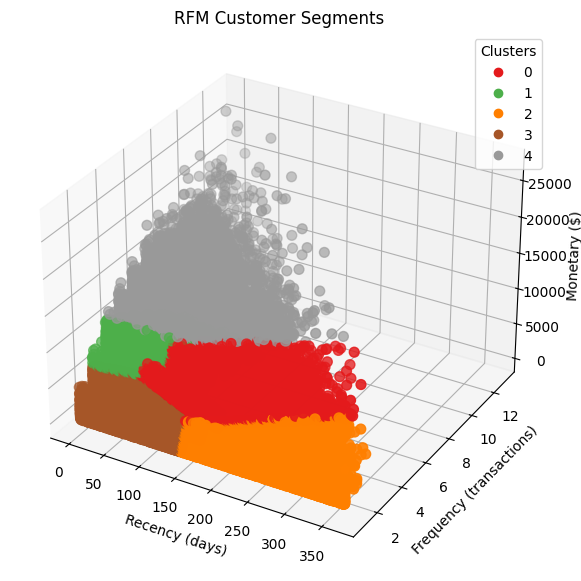

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'], 
    rfm['Frequency'], 
    rfm['Monetary'], 
    c=rfm['RFM_Clusters'], 
    cmap='Set1', 
    s=50
)

ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency (transactions)')
ax.set_zlabel('Monetary ($)')
ax.set_title('RFM Customer Segments')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

| Cluster | Recency | Frequency | Monetary  | Interpretation                                                                                                                     |
| ------- | ------- | --------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| 0       | 155.79  | 3.44      | 5,233.47  | **Lost / Dormant:** High Recency (long time since last purchase), moderate Frequency & Monetary. Customers may need re-engagement. |
| 1       | 41.04   | 4.27      | 5,638.33  | **Active / Loyal:** Low Recency (recently purchased), decent Frequency & Monetary. Good customers to retain.                       |
| 2       | 244.22  | 1.59      | 1,873.75  | **At-Risk / Inactive:** Very high Recency, very low Frequency & Monetary. Likely churned or disengaged.                            |
| 3       | 63.37   | 2.22      | 2,341.08  | **New / Low-Value:** Moderate Recency, low Frequency & Monetary. New or occasional buyers.                                         |
| 4       | 49.34   | 6.26      | 10,268.85 | **Best / VIP:** Low Recency, very high Frequency & Monetary. Most valuable, high-spending customers.                               |
